In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py 
import plotly.graph_objs as go  


In [198]:
from datetime import date
from datetime import datetime
from datetime import timedelta
date = '2021-12-20'
past_days = 30
df_range = pd.DataFrame()
datetime_object = datetime.strptime(date, '%Y-%m-%d')
start_date = datetime_object + timedelta(days=-past_days)
end_date = datetime_object
date_range1 = pd.date_range(start=start_date, end=end_date, closed='right').strftime('%m/%d/%Y')
date_range1

Index(['11/21/2021', '11/22/2021', '11/23/2021', '11/24/2021', '11/25/2021',
       '11/26/2021', '11/27/2021', '11/28/2021', '11/29/2021', '11/30/2021',
       '12/01/2021', '12/02/2021', '12/03/2021', '12/04/2021', '12/05/2021',
       '12/06/2021', '12/07/2021', '12/08/2021', '12/09/2021', '12/10/2021',
       '12/11/2021', '12/12/2021', '12/13/2021', '12/14/2021', '12/15/2021',
       '12/16/2021', '12/17/2021', '12/18/2021', '12/19/2021', '12/20/2021'],
      dtype='object')

In [34]:
m = ['lines','makers','lines+markers']
a=['a','b']
m[a.index('a')]

'lines'

In [48]:
def plotstate(statename,feature):
    #statement :list
    start='20201213'
    end='20220227'
    dates = pd.date_range(start,end).strftime("%m-%d-%Y").to_list()
    #features = ['Confirmed','Deaths','Recovered','Active']
    data = []
    #m = ['lines','markers','lines+markers']
    for sn in statename:
        #lista = []
        for fea in feature:
            
            lista = []
                
            for date in dates:
        
                df = pd.read_csv(date+'.csv')
            #df = df.fillna(-100)
                df.set_index('Province_State', inplace=True)
        
            
            #if df.loc[name,feature].tolist()>0:
                lista.append(df.loc[sn,fea].tolist())
            trace = go.Scatter(
            x = np.array(dates),
            y =np.log2(1+np.array(lista)),
            #mode = m[statename.index(sn)],
            mode = 'lines',
            name = sn+'_'+fea)
            data.append(trace)
    
    return lista
    layout = dict( xaxis = dict(title = 'dates'), yaxis = dict(title = 'population(log2)'))
    fig = dict(data=data, layout=layout)
    py.iplot(fig)
    
        
plotstate(['California'],['Confirmed'])    
    

In [98]:
def plotbar(state,feature):
    start='20201213'
    end='20220227'
    dates = pd.date_range(start,end).strftime("%m-%d-%Y").to_list()
    lista=[]
    new_list = []
    new_dates = []
    for date in dates:
        df = pd.read_csv(date+'.csv')
        df.set_index('Province_State',inplace=True)
        lista.append(df.loc[state,feature].tolist())
    for i in range(0,len(lista),10):
        new_list.append(lista[i])
        new_dates.append(dates[i])
    new_list = np.array(new_list[1:])-np.array(new_list[0:-1])
    new_dates = new_dates[1:]
        
    df1 = pd.DataFrame({feature:new_list,'date':new_dates})
    fig=px.bar(df1,x='date',y=feature,title='New case pers 10 days in '+ state,width=800,height=600)
    fig.update_layout(title_text='New '+ feature+  ' per 10 days in '+ state, title_x=0.5,font=dict(size=18))
    fig.show()
    
plotbar('Washington','Deaths')  
    

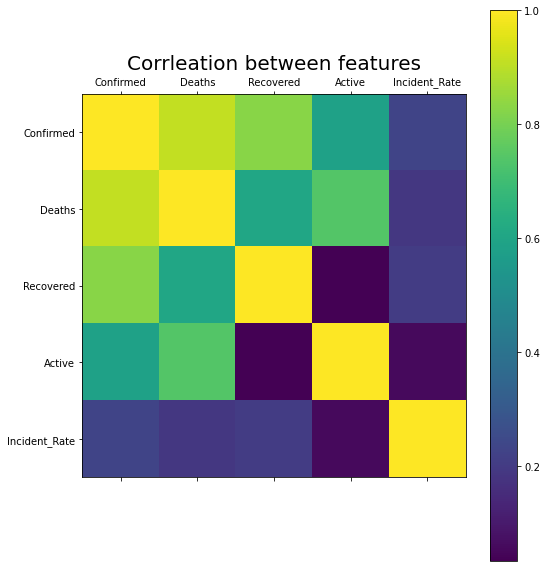

In [78]:
def plotcorr(date):
    #date form : MM-DD-YYYY
    df = pd.read_csv(date+'.csv')
    df = df[['Confirmed','Deaths','Recovered','Active','Incident_Rate']]
    df.fillna(df.mean())
    fig = plt.figure(figsize=(8,8)) 
    ax = fig.add_subplot(111)
    cax = ax.matshow(df.corr())  
    fig.colorbar(cax)  
    ticks = np.arange(0,5,1) 
    ax.set_xticks(ticks)  
    ax.set_yticks(ticks)
    ax.set_xticklabels(['Confirmed', 'Deaths', 'Recovered', 'Active','Incident_Rate']) #生成x轴标签
    ax.set_yticklabels(['Confirmed', 'Deaths','Recovered', 'Active', 'Incident_Rate'])
    plt.title('Corrleation between features',fontsize=20)
    plt.tight_layout()
#plt.show()
#print(df.corr)
#pd.plotting.scatter_matrix(df, alpha=0.2)
plotcorr('01-31-2021')

In [12]:
def plotpie(date,feature):
    df = pd.read_csv(date+'.csv')
    df = df.loc[:,['Province_State',feature]]
    df.sort_values(feature,inplace=True,ascending=False,ignore_index=False)
    df.reset_index(drop=True, inplace=True)
    data = df.loc[0:14,feature].tolist()
    data.append(sum(df.loc[15:57,feature]))
    sn = df.loc[0:14,'Province_State'].tolist()
    sn.append('43 regions')
    df_new = pd.DataFrame(data,columns=[feature])
    df_new.insert(df_new.shape[1], 'Province_State', sn)
#df_new
    fig = px.pie(df_new, values=feature, names='Province_State', title=feature +' proportion on '+ date)
    fig.show()
    return 0
#fig = px.pie(df, values='Confirmed', names='Province_State', title='Confirmed proportion on 01-03-2021')
#fig.show()
plotpie('12-13-2020','Deaths')

0

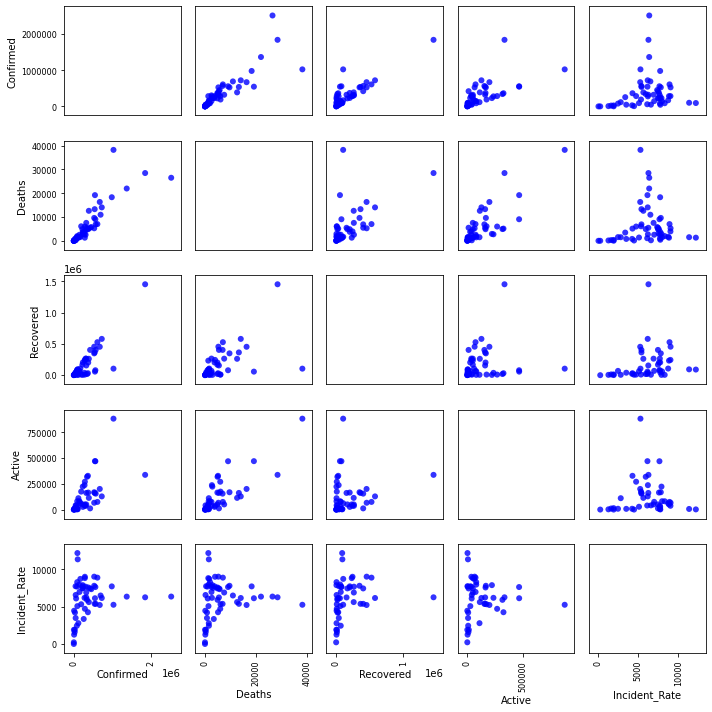

In [37]:
def plotscatter(date):
    df = pd.read_csv(date+'.csv')
    df = df[['Confirmed','Deaths','Recovered','Active','Incident_Rate']]
    fig = pd.plotting.scatter_matrix(df,figsize=(10,10),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  
    plt.tight_layout()
    plt.show()
plotscatter('01-03-2021')    

In [107]:
def corr_deaths_and_vacc(statename,abbr):
    df = pd.read_csv('vacc.csv')
    start='20201214'
    end='20220227'
    dates = pd.date_range(start,end).strftime("%m-%d-%Y").to_list()
    lista = []
    for date in dates:
        
        df = pd.read_csv(date+'.csv')
        df = df.fillna(-100)
        df.set_index('Province_State', inplace=True)
        lista.append(df.loc[statename,'Deaths'].tolist())
    vacc = pd.read_csv('vacc.csv')
    subdata = vacc.loc[(vacc['Location']==abbr)]
    vacc = list(reversed(subdata['Distributed'].tolist()))

    new_data = {'vaccination':vacc,'deaths':lista}
    new_data = pd.DataFrame(new_data)
    #plt.figure(figsize = (6,6))  # 图片像素大小
    #fig = pd.plotting.scatter_matrix(new_data,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
    #plt.show()
    #sns.pairplot(new_data)
    #sns.jointplot(x = 'vaccination', y = 'deaths', data = new_data ,kind = 'hex')
    p=sns.jointplot(x = 'vaccination', y = 'deaths', data = new_data)
    p.fig.suptitle('Correlation between deaths and vaccination in '+ statename)
    p.fig.tight_layout()
    p.fig.subplots_adjust(top=0.95)


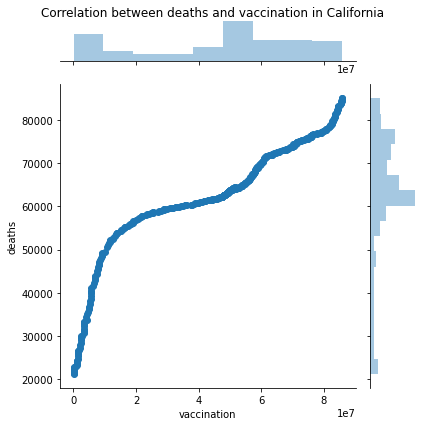

In [109]:
corr_deaths_and_vacc('California','CA')

In [113]:
def plotvaccfunction(date,feature):
    #data formal: mm/dd/yyyy
    #feature: a list
    vacc = pd.read_csv('C:/Users/12127/Desktop/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')
    vacc = vacc.loc[vacc['Date']==date]
    x = vacc['Location'].tolist()
    data = []
    for fea in feature:
        
        temp_lst = vacc[fea].tolist()
    #eight = vacc['Series_Complete_18PlusPop_Pct'].tolist()
    #sw = vacc['Series_Complete_65PlusPop_Pct'].tolist()
    
        trace = go.Scatter(
          x = np.array(x),
          y = np.array(temp_lst),
          mode = 'lines',
          name = fea
        )
        data.append(trace)
   

    

    layout = dict( xaxis = dict(title = 'State'), yaxis = dict(title = 'percentage(%)'))
    fig = dict(data=data, layout=layout)
    #fig.update_layout(title_text='Comparison of different ages', title_x=0.5,font=dict(size=18))
    py.iplot(fig )

    
date = '02/27/2022'
feature = ['Additional_Doses_12Plus_Vax_Pct','Additional_Doses_18Plus_Vax_Pct','Additional_Doses_65Plus_Vax_Pct']
plotvaccfunction(date,feature)

In [42]:
vacc = pd.read_csv('C:/Users/12127/Desktop/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')
vacc = vacc.loc[vacc['Location']=='WI']
twele = list(reversed(vacc['Series_Complete_12Plus'].tolist()))
eight = list(reversed(vacc['Series_Complete_18Plus'].tolist()))
sw = list(reversed(vacc['Series_Complete_65Plus'].tolist()))
x = list(reversed(vacc['Date'].tolist()))
trace3 = go.Scatter(
          x = np.array(x),
          y = np.array(sw),
          mode = 'lines',
          name = '65+'
    )
trace4 = go.Scatter(
      x = np.array(x),
      y = np.array(eight),
      mode = 'lines',
      name = '18+'
    )
trace5 = go.Scatter(
      x = np.array(x),
      y = np.array(twele),
      mode = 'lines',
      name = '12+'
    )
ca_con = plotstate('Wyoming','Confirmed')
trace6 = go.Scatter(
      x = np.array(x),
      y = np.array(ca_con),
      mode = 'lines',
      name = 'Confirmed'
      
    )

layout = dict(title = 'The total number of fully vaccinated and Confirmed in CA', xaxis = dict(title = 'Date'), yaxis = dict(title = 'population'))
fig = dict(data=[trace3,trace4,trace5,trace6], layout=layout)
py.iplot(fig)

In [67]:
vacc = pd.read_csv('C:/Users/12127/Desktop/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')
vacc.columns[0]

'Date'

<Figure size 432x432 with 0 Axes>

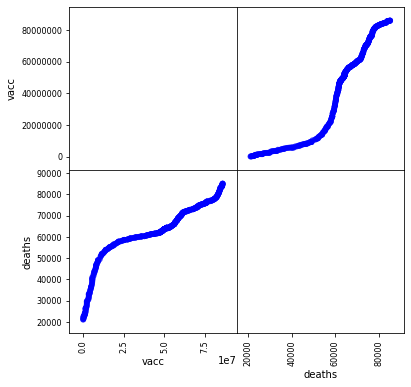

In [74]:
plt.figure(figsize = (6,6))  # 图片像素大小
fig = pd.plotting.scatter_matrix(new_data,figsize=(6,6),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()

In [31]:
pd.read_csv('02-27-2021.csv')

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2021-02-28 05:30:29,32.3182,-86.9023,492683,9930,285130.0,197623.0,1.0,10048.223757,4032426.0,NaN,2.015495,84000001.0,USA,82240.951545,NaN
1,Alaska,US,2021-02-28 05:30:29,61.3707,-152.4044,58295,290,NaN,NaN,2.0,7968.751068,1679675.0,NaN,0.497470,84000002.0,USA,229606.517713,NaN
2,American Samoa,US,2021-02-28 05:30:29,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN
3,Arizona,US,2021-02-28 05:30:29,33.7298,-111.4312,815707,15967,NaN,NaN,4.0,11206.741518,7623393.0,NaN,1.957443,84000004.0,USA,51486.752404,NaN
4,Arkansas,US,2021-02-28 05:30:29,34.9697,-92.3731,319195,5417,309268.0,4510.0,5.0,10577.061996,2641892.0,NaN,1.697082,84000005.0,USA,87543.525027,NaN
5,California,US,2021-02-28 05:30:29,36.1162,-119.6816,3624377,51747,NaN,NaN,6.0,9180.050437,48219490.0,NaN,1.426621,84000006.0,USA,122036.894760,NaN
6,Colorado,US,2021-02-28 05:30:29,39.0598,-105.3111,427462,5945,NaN,NaN,8.0,7422.844180,6190522.0,NaN,1.390767,84000008.0,USA,107497.930101,NaN
7,Connecticut,US,2021-02-28 05:30:29,41.5978,-72.7554,279946,7622,NaN,NaN,9.0,7851.990597,6299277.0,NaN,2.722668,84000009.0,USA,176683.588166,NaN
8,Delaware,US,2021-02-28 05:30:29,39.3185,-75.5071,86517,1418,NaN,NaN,10.0,8884.801656,1387364.0,NaN,1.638984,84000010.0,USA,142474.357236,NaN
9,Diamond Princess,US,2021-02-28 05:30:29,NaN,NaN,49,0,NaN,NaN,88888.0,NaN,NaN,NaN,0.000000,84088888.0,USA,NaN,NaN
